In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_models_grid(input_cube, true_cube, unet_pred, fno_pred, axis=0, index=0, save_path=None):
    """
    3x2 subplot 구조로 시각화:
    Row 1: Input, Ground Truth
    Row 2: U-Net Prediction, U-Net Error
    Row 3: FNO Prediction, FNO Error
    각 subplot에는 축 눈금 및 colorbar 단위 포함 (∑(1 + ρ), |Δρ| 등)
    """
    assert input_cube.ndim == 3, "input_cube must be 3D"
    assert true_cube.ndim == 3
    assert unet_pred.ndim == 3
    assert fno_pred.ndim == 3

    # Projection
    input_proj = np.log10(np.sum(input_cube, axis=axis))
    true_proj = np.log10(np.sum(true_cube, axis=axis))
    unet_proj = np.log10(np.sum(unet_pred, axis=axis))
    fno_proj = np.log10(np.sum(fno_pred, axis=axis))
    diff_unet = np.abs(true_proj - unet_proj)
    diff_fno = np.abs(true_proj - fno_proj)

    # axis label for projection
    axis_label_map = {0: "x", 1: "y", 2: "z"}
    proj_label = rf"$\sum_{{{axis_label_map[axis]}}} (1 + \rho)$"

    fig, axs = plt.subplots(3, 2, figsize=(12, 15))
    plt.subplots_adjust(hspace=0.3, wspace=0.25)

    def plot_proj(ax, data, title, cmap, vmin=None, vmax=None, label=None):
        im = ax.imshow(data, origin="lower", cmap=cmap, interpolation="bilinear",
                       vmin=vmin, vmax=vmax)
        ax.set_title(title, fontsize=12)
        cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        cbar.set_label(label, fontsize=10)
        ax.set_xlabel("Voxel Index (X)", fontsize=9)
        ax.set_ylabel("Voxel Index (Y)", fontsize=9)

    # Row 1
    plot_proj(axs[0, 0], input_proj, "Input (Evolved Density)", cmap="cividis", label=f"log({proj_label})")
    plot_proj(axs[0, 1], true_proj, "Ground Truth Initial Density", cmap="viridis", label=f"log({proj_label})")

    # Row 2
    plot_proj(axs[1, 0], unet_proj, "U-Net Prediction", cmap="viridis", label=f"log({proj_label})")
    plot_proj(axs[1, 1], diff_unet, "U-Net |GT - Pred|", cmap="magma", label=r"$|\Delta \rho|$")

    # Row 3
    plot_proj(axs[2, 0], fno_proj, "FNO Prediction", cmap="viridis", label=f"log({proj_label})")
    plot_proj(axs[2, 1], diff_fno, "FNO |GT - Pred|", cmap="magma", label=r"$|\Delta \rho|$")

    # 제목 및 저장
    fig.suptitle(f"Subcube index = {index} | Projection axis = {axis_label_map[axis]}", fontsize=14, y=0.93)
    plt.tight_layout(rect=[0, 0, 1, 0.94])

    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, bbox_inches="tight", dpi=150)
        print(f"✅ Saved to {save_path}")
    else:
        plt.show()


✅ Saved to fig/prediction_comparison_grid_index999.png


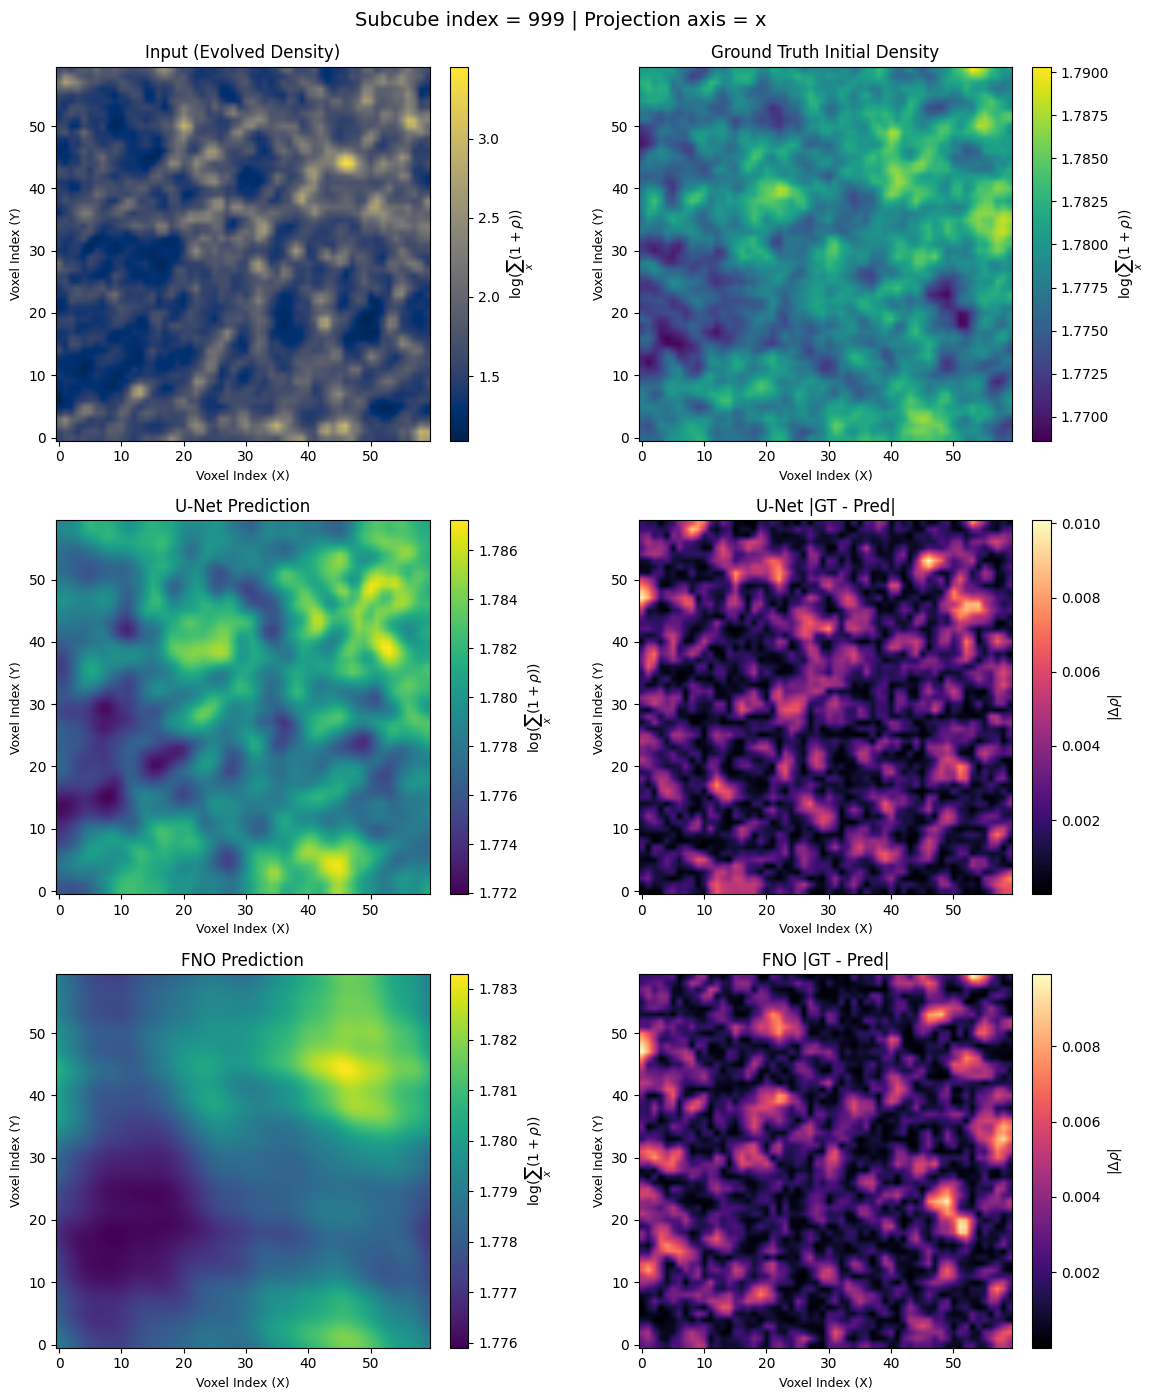

In [3]:
# ===== File paths and parameters =====
input_file = "/caefs/data/IllustrisTNG/subcube/input/subcubes_stride4_50mpc_010.h5"
target_file = "/caefs/data/IllustrisTNG/subcube/output/subcubes_stride4_50mpc_010.h5"
unet_pred_file = "/caefs/data/IllustrisTNG/predictions/unet/Sample100_epoch100/subcubes_stride4_50mpc_010.h5"
fno_pred_file  = "/caefs/data/IllustrisTNG/predictions/fno/Sample100_epoch100/subcubes_stride4_50mpc_010.h5"

index = 999
axis = 0

with h5py.File(input_file, "r") as f_in, \
     h5py.File(target_file, "r") as f_gt, \
     h5py.File(unet_pred_file, "r") as f_unet, \
     h5py.File(fno_pred_file, "r") as f_fno:

    x = f_in["subcubes"][index]
    y = f_gt["subcubes"][index]
    y_unet = f_unet["subcubes"][index, 0]
    y_fno  = f_fno["subcubes"][index, 0]

plot_models_grid(x, y, y_unet, y_fno, axis=axis, index=index,
                 save_path=f"fig/prediction_comparison_grid_index{index}.png")